# Caravan war screenshot reading
```
This is a personal project to understand and improve my knowledge/tactics in the game Caravan War.
Copyright (C) 2019  Kasonnara <kasonnara@laposte.net>

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.
```

This experiment aim at automatically extracting text data from screenshots of the game

In [40]:
import itertools

import PIL.Image
import PIL.ImageFilter

import pytesseract

## Load some screenshots

In [5]:
screen_gate = PIL.Image.open("../img/screenshots/Screenshot_2020-04-26-16-31-59-237_com.hikergames.caravanwar.jpg")
screen_camp = PIL.Image.open("../img/screenshots/Screenshot_2020-04-24-22-13-51-514_com.hikergames.caravanwar.jpg")
screen_fight= PIL.Image.open("../img/screenshots/Screenshot_2020-04-24-22-20-34-173_com.hikergames.caravanwar.jpg")

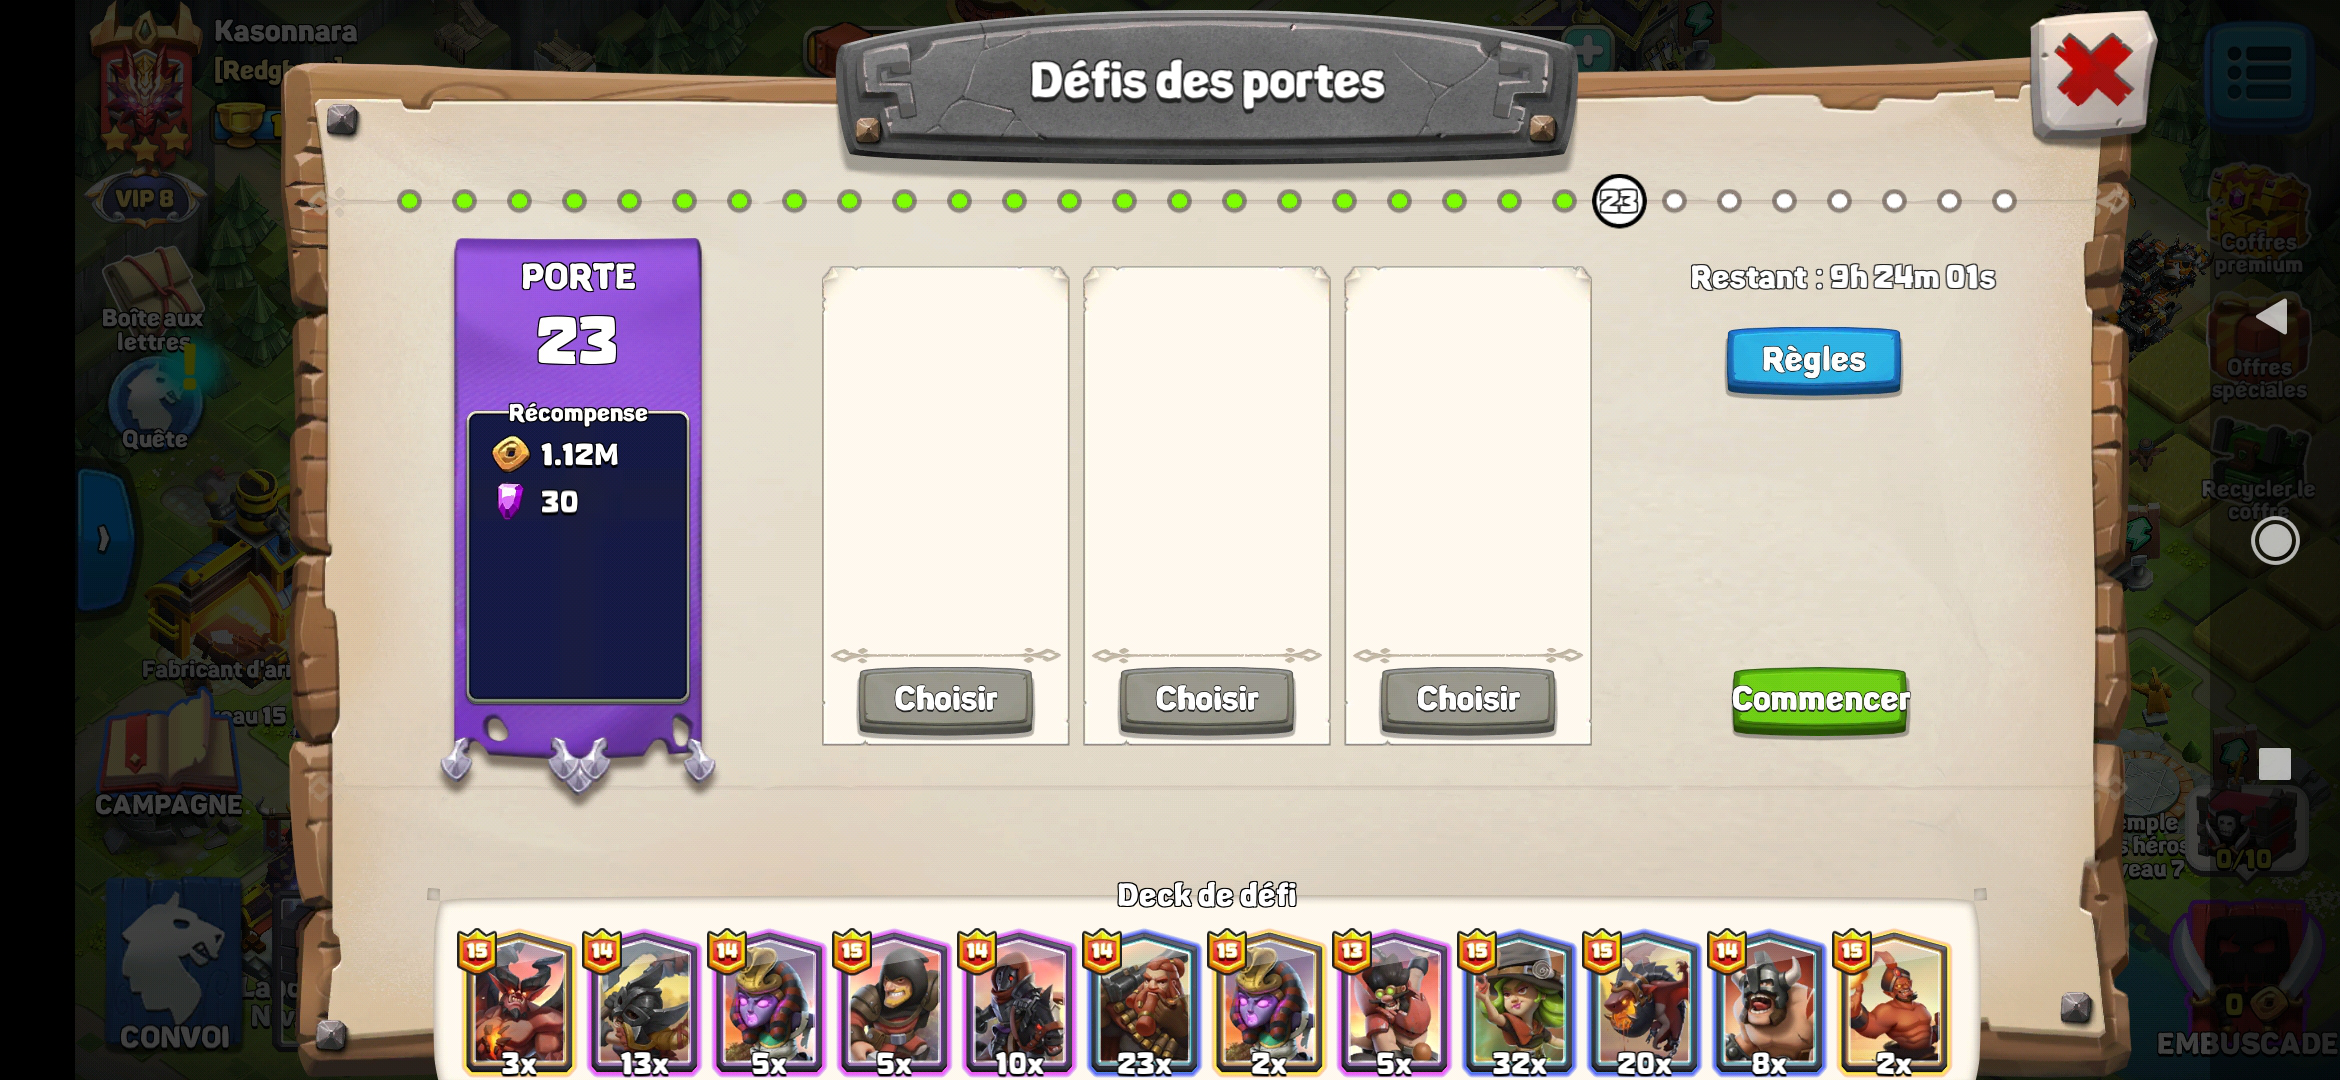

In [6]:
screen_gate

## Test some filters

In [52]:
#screen_gate.filter(PIL.ImageFilter.CONTOUR)

In [53]:
#screen_gate.filter(PIL.ImageFilter.FIND_EDGES)

In [54]:
#screen_gate.filter(PIL.ImageFilter.FIND_EDGES)

## Filter white pixels

Most text is writter with a clear white font, we can use this to eliminate most of the emage, clearing the path for pytesseract OCR analysis.

In [55]:
def white_text_filter(screenshot: PIL.Image):
    result = PIL.Image.new('RGBA', screen_gate.size)


    screenshot_access = screenshot.load()
    result_access = result.load()

    for x, y in itertools.product(range(screenshot.size[0]), range(screenshot.size[1])):
        result_access[x,y] =  (0,0,0) if all(v > 250 for v in screenshot_access[x,y]) else (255,255,255)
    
    return result

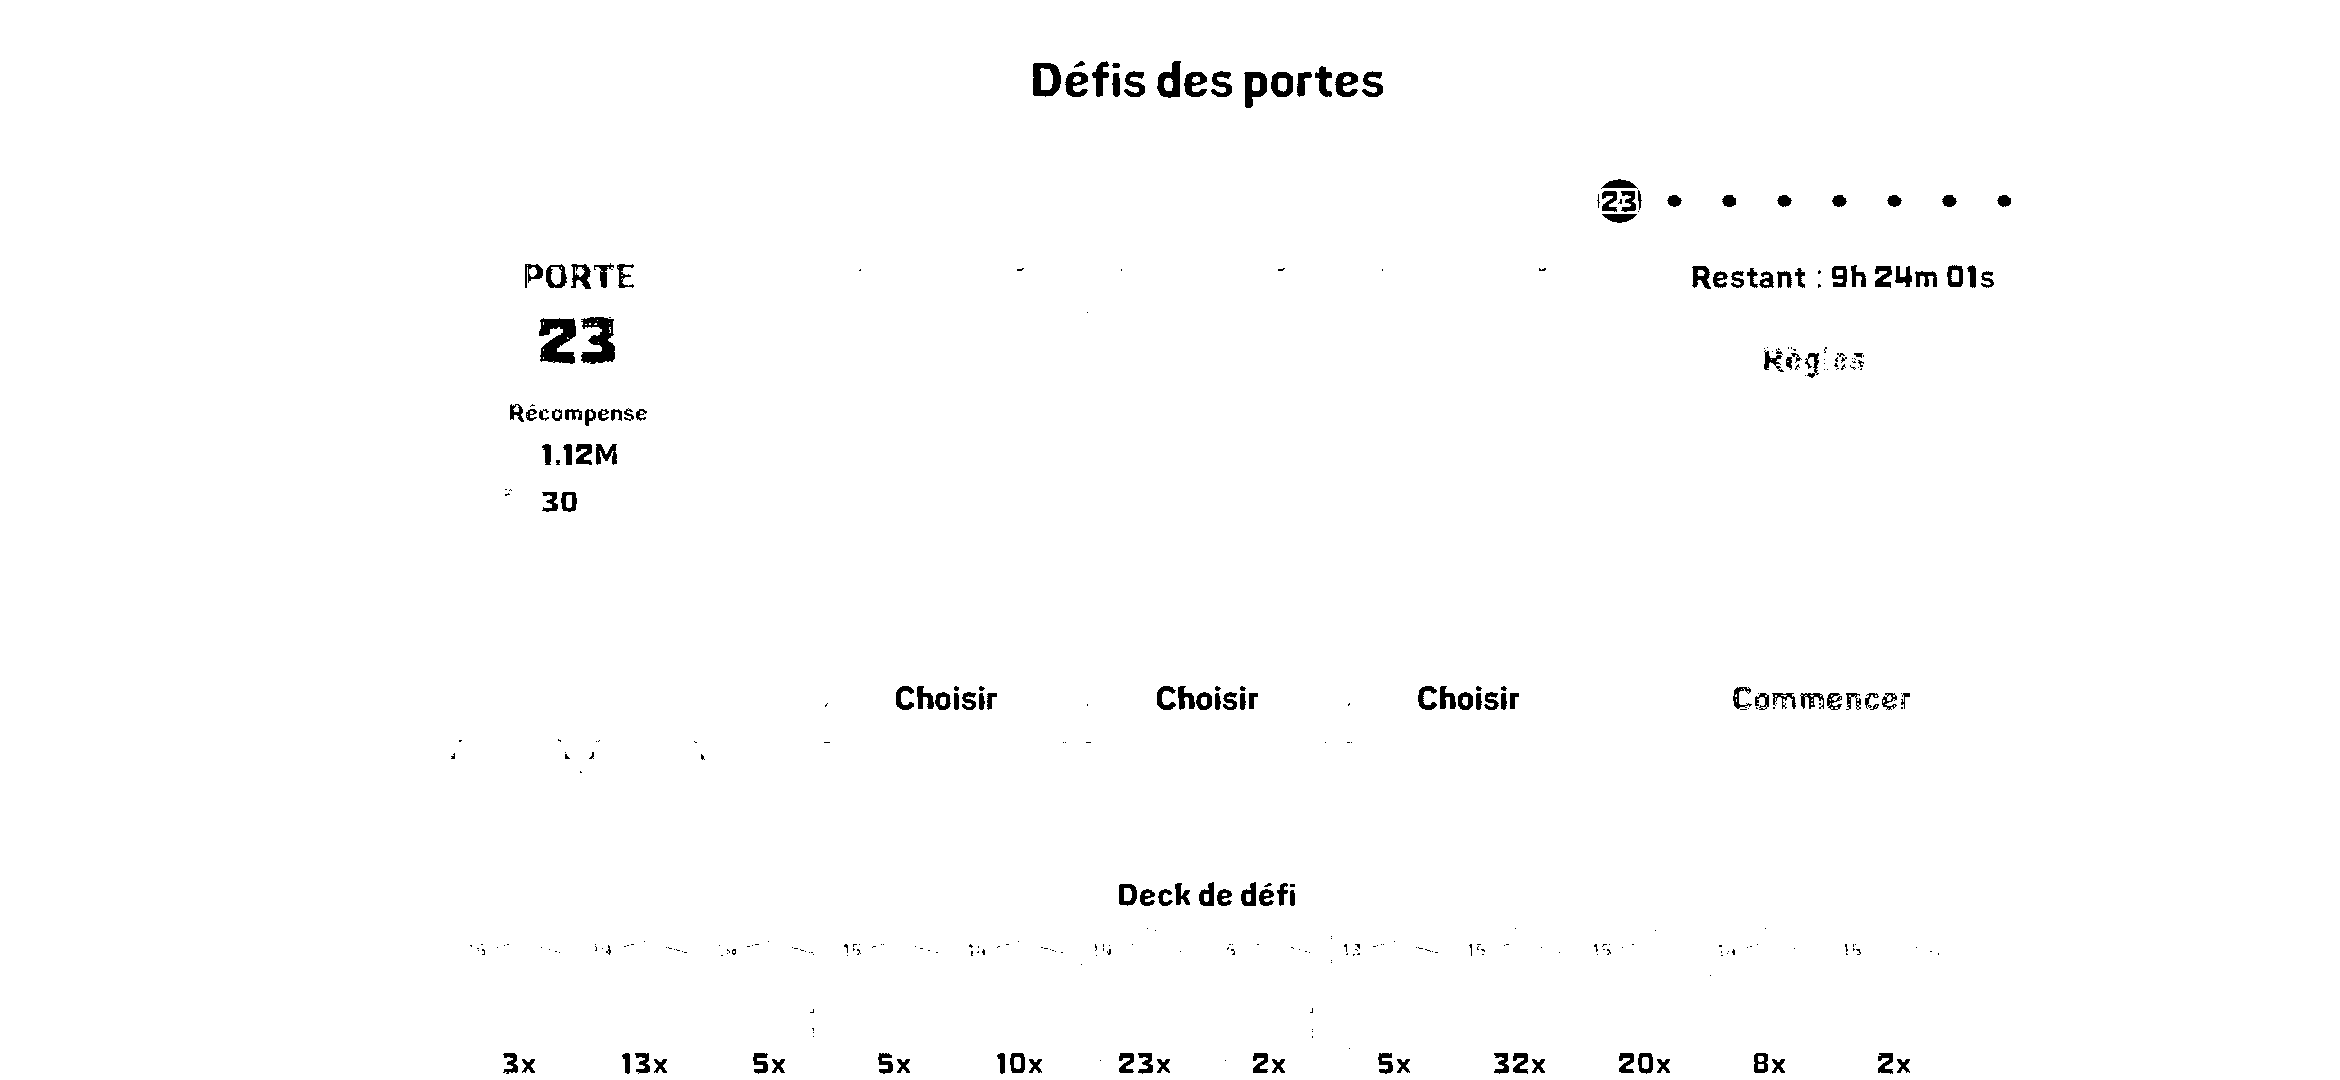

In [56]:
filtered_sg = white_text_filter(screen_gate)
filtered_sg

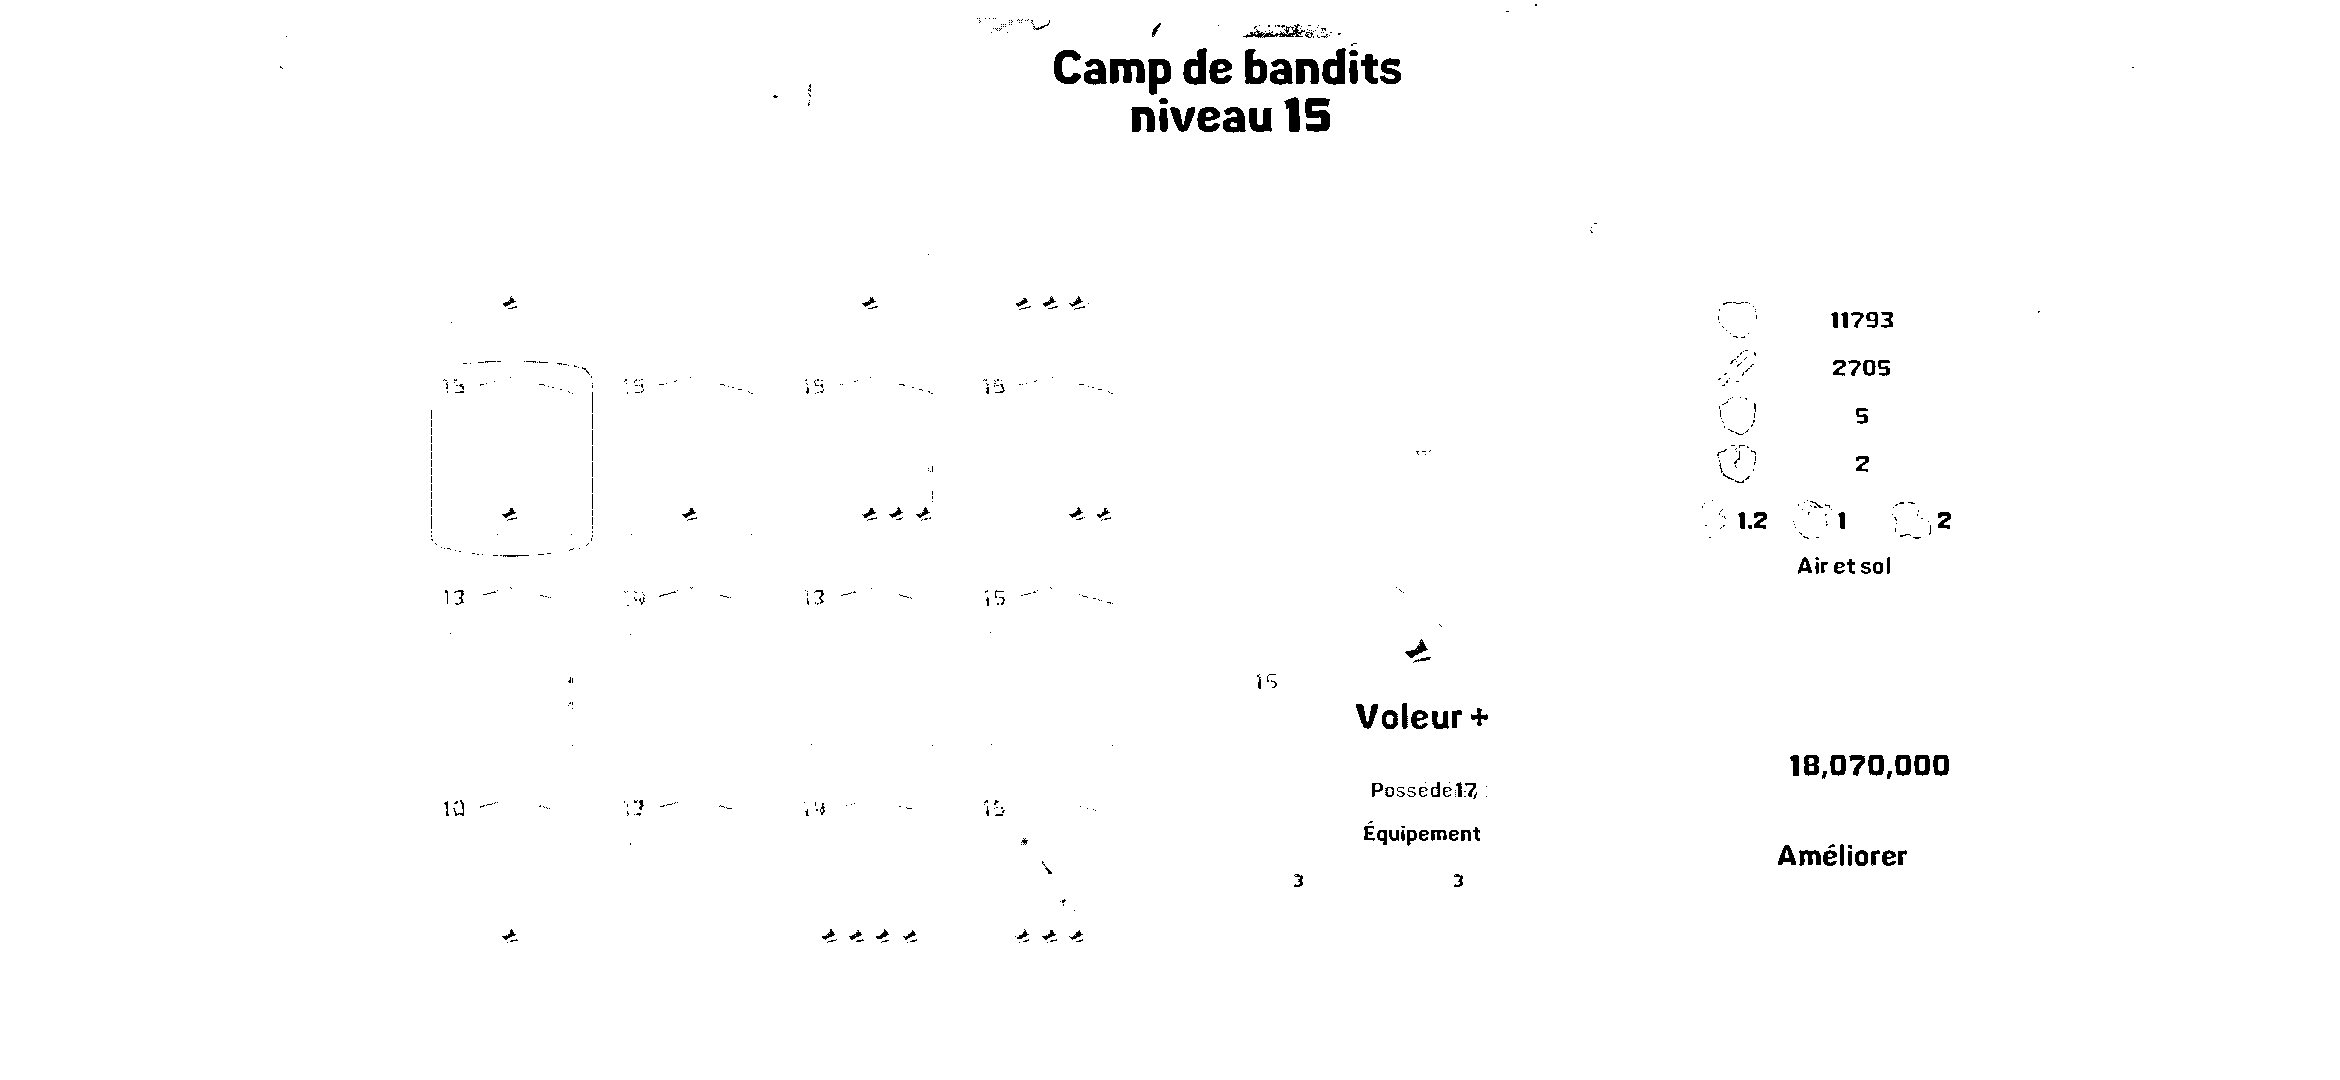

In [59]:
filtered_sc = white_text_filter(screen_camp)
filtered_sc

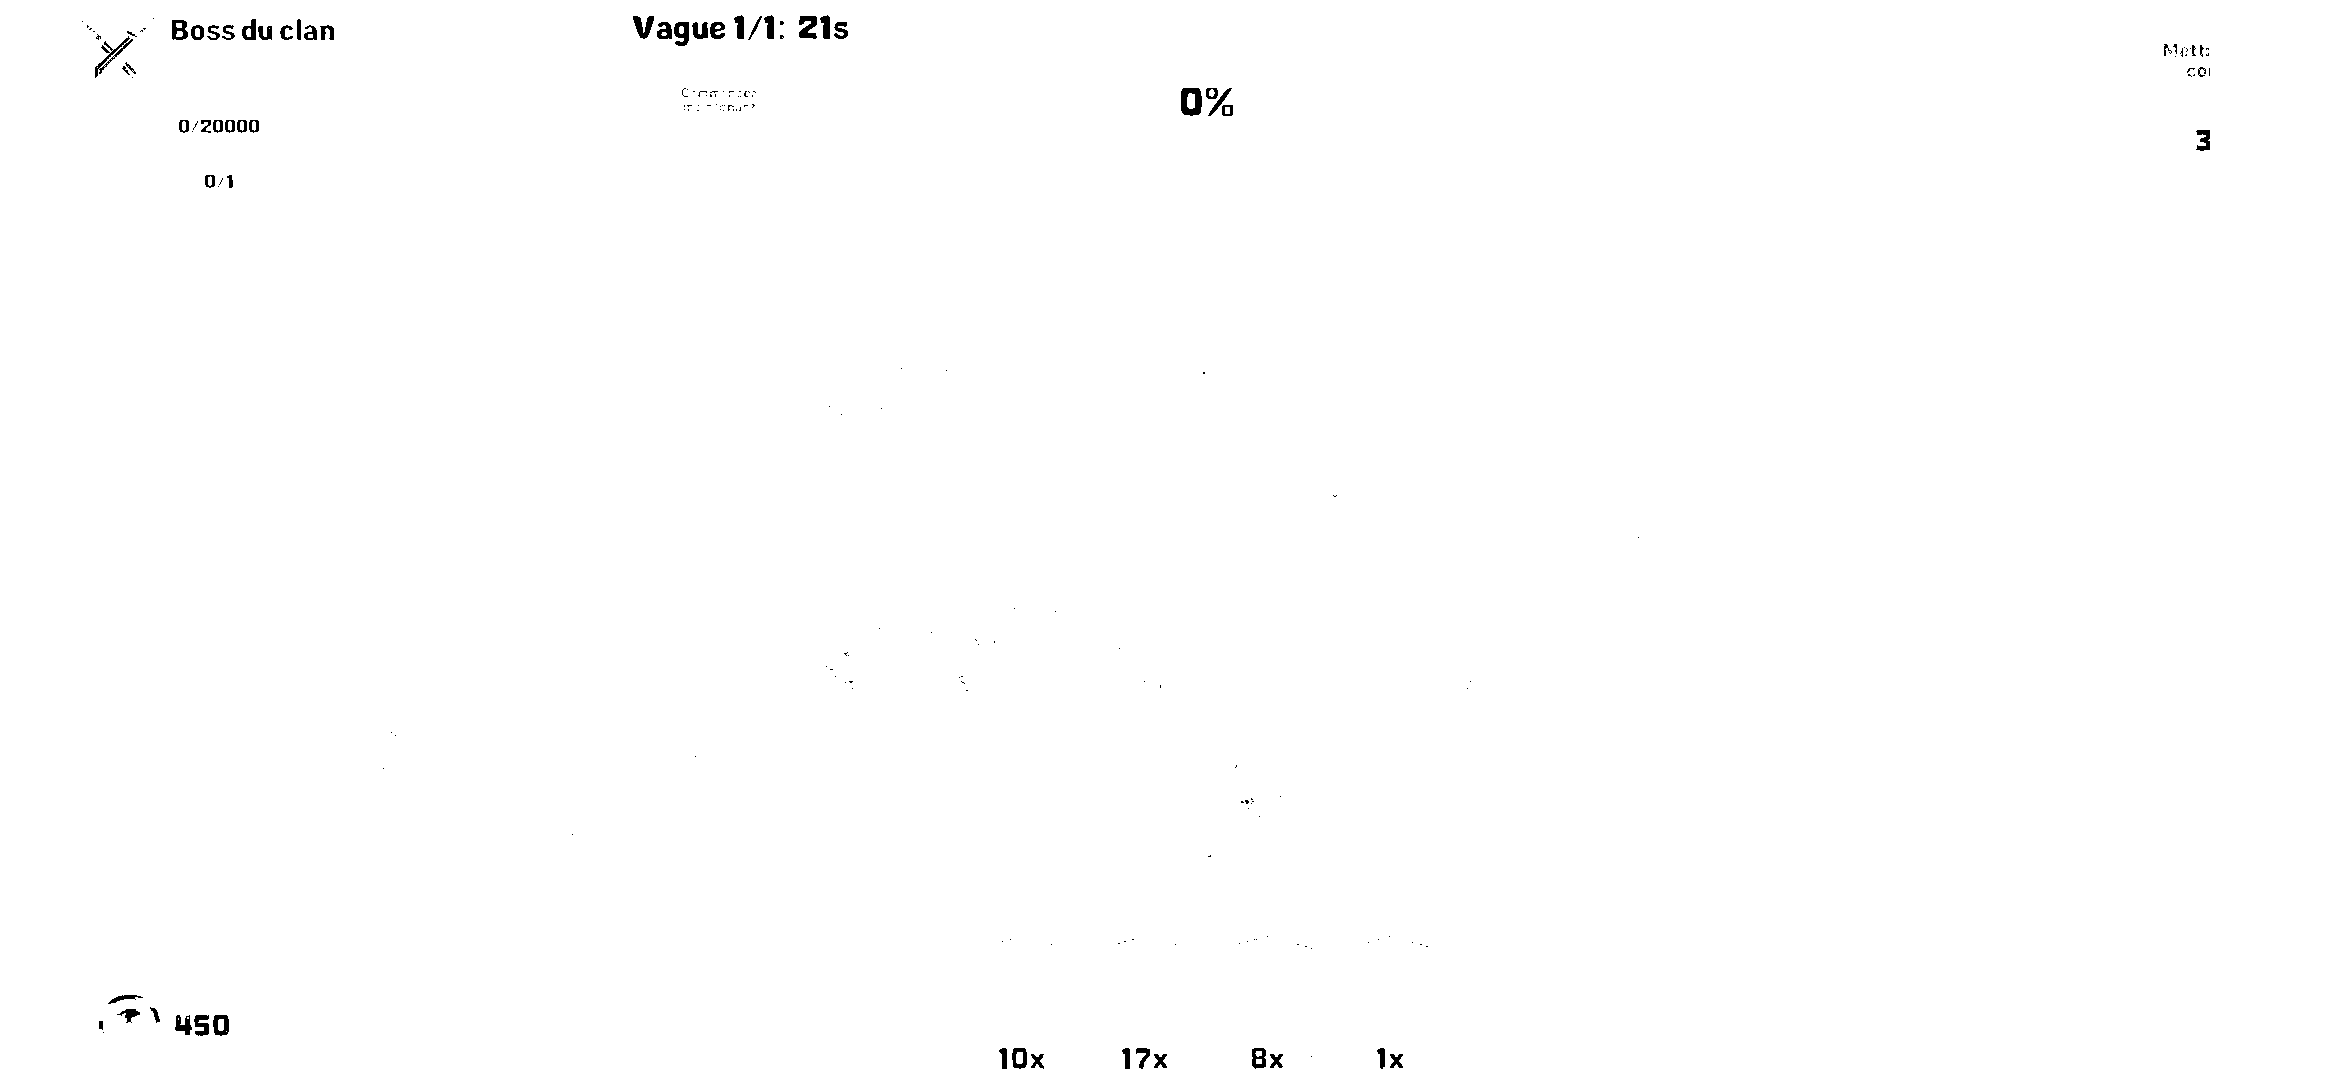

In [60]:
filtered_sf = white_text_filter(screen_fight)
filtered_sf

## Apply OCR to filtered images

In [48]:
ocr_result = pytesseract.image_to_string(result)
ocr_result

'Defis des portes\n\na.\n23) «© © &® #® &® © @®\n\nPORTE , . . . Restant : 9h 24m Ols\n23 Kéges\nRécompense\n112M\n30\nChoisir Choisir . Choisir Caommencer\nDeck de défi\n\nBx 13x Sx 5x 10x 23x 2x 5x B2x 20x Bx 2x'

Filter the last line that contain the data we are intersted in, and correct the small remaining errors

In [51]:
[int(x) for x in ocr_result.split('\n')[-1].replace('B', '3').replace('S', '5').replace('x', '').split(' ')]

[3, 13, 5, 5, 10, 23, 2, 5, 32, 20, 3, 2]